# Raster Calculations

In [1]:
# Necessary imports
import rasterio
import numpy as np
from rasterio.plot import show
%matplotlib inline

In [2]:
# Read the clipped raster data from last lesson
data = raster = rasterio.open("Data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

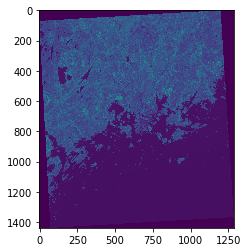

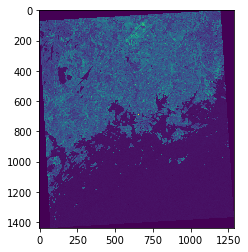

In [3]:
# Want to calculate the normalized difference vegetation index (NDVI)
# This is formed from the Red and Near-IR bands. raster.read returns a Numpy array
dataRed= raster.read(4)
dataNIR = raster.read(5)

# PLot the data
show(dataRed)
show(dataNIR)

In [4]:
# Convert the arrays from uint8 to float
dataRed = dataRed.astype('f4')
dataNIR = dataNIR.astype('f4')

# Also allow division by zero in Numpy (produces NaN?)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
# Create an empty numpy array to hold the dataNDVI
dataNDVI = np.empty(raster.shape, dtype="f4")

In [6]:
# Mask off zeros in both arrays and calculate NDVI. Use -999 as a blank value
msk = np.logical_or ( dataRed > 0, dataNIR > 0 )
dataNDVI = np.where ( msk,  (dataNIR - dataRed ) / ( dataNIR + dataRed ), -999 )

-108.16965
310.46048
0.98275864
-999.0


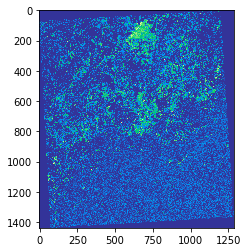

In [7]:
# Plot
print(dataNDVI.mean())
print(dataNDVI.std())
print(dataNDVI.max())
print(dataNDVI.min())
show(dataNDVI, cmap='terrain', vmin=0, vmax=(dataNDVI.max()))